In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop('CustomerID', axis = 1, inplace = True)

In [4]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'}, inplace=True)
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


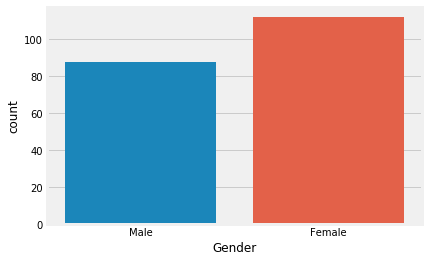

In [7]:
sns.countplot('Gender', data=df)

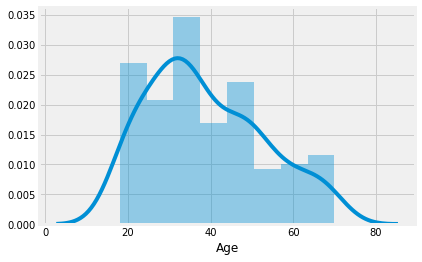

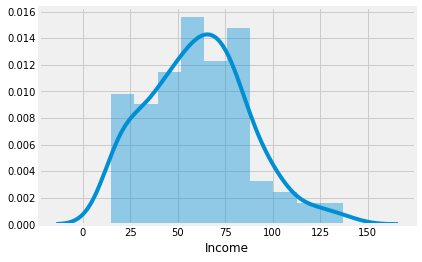

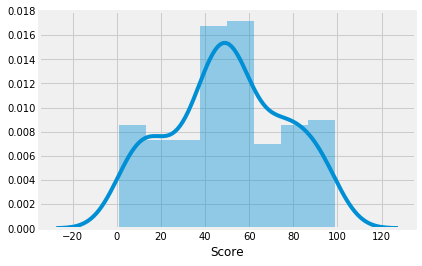

In [8]:
for feature in df.columns:
    if(feature != 'Gender'):
        sns.distplot(df[feature])
        plt.show()

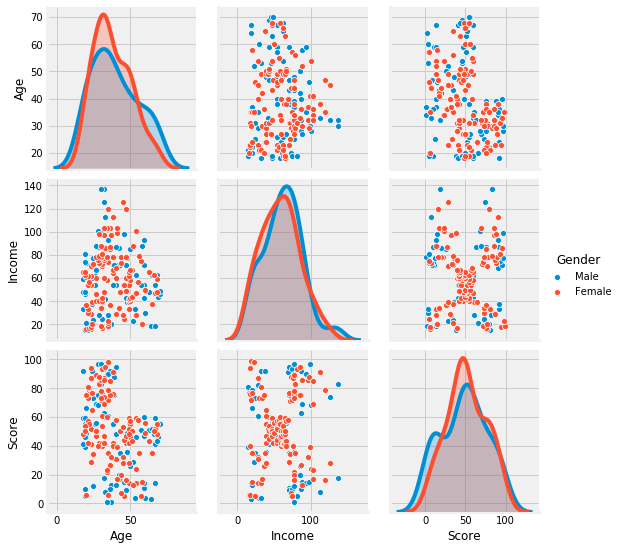

In [9]:
sns.pairplot(data=df,diag_kind="kde",hue='Gender')

In [10]:
df['Male'] = pd.get_dummies(df['Gender'],drop_first=True)

In [11]:
df.drop('Gender',axis=1,inplace=True)

In [12]:
(list(df.columns))

['Age', 'Income', 'Score', 'Male']

In [13]:
df_copy = df.copy()

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def kmeans(x,y,z):
    plt.figure(figsize=(20,10))
    best_fit = []
    silhouette = []
    
    if(z==_):
        X = df.loc[:, [x,y]]
    else:
        X = df.loc[:, [x,y,z]]

    for i in range(2,11):
        kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
        cluster_labels = kmeans_model.fit_predict(X)
        best_fit.append(kmeans_model.inertia_)
        silh = silhouette_score(X,cluster_labels)
        
        silhouette.append(silh)
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    fig.suptitle(list(X.columns),fontsize=25)
    ax1.plot( best_fit, marker='.',markersize=15)
    ax2.plot(silhouette, marker='.',markersize=15)
    ax1.set_title('Elbow method',fontsize=20)
    ax2.set_title('Silhouette',fontsize=20)
    ax1.set_xlabel('Clusters', fontsize=20)
    ax1.set_ylabel('Variance', fontsize=20)
    ax2.set_xlabel('Clusters', fontsize=20)
    ax2.set_ylabel('Silhouette Score', fontsize=20)    
    plt.show()

<Figure size 1440x720 with 0 Axes>

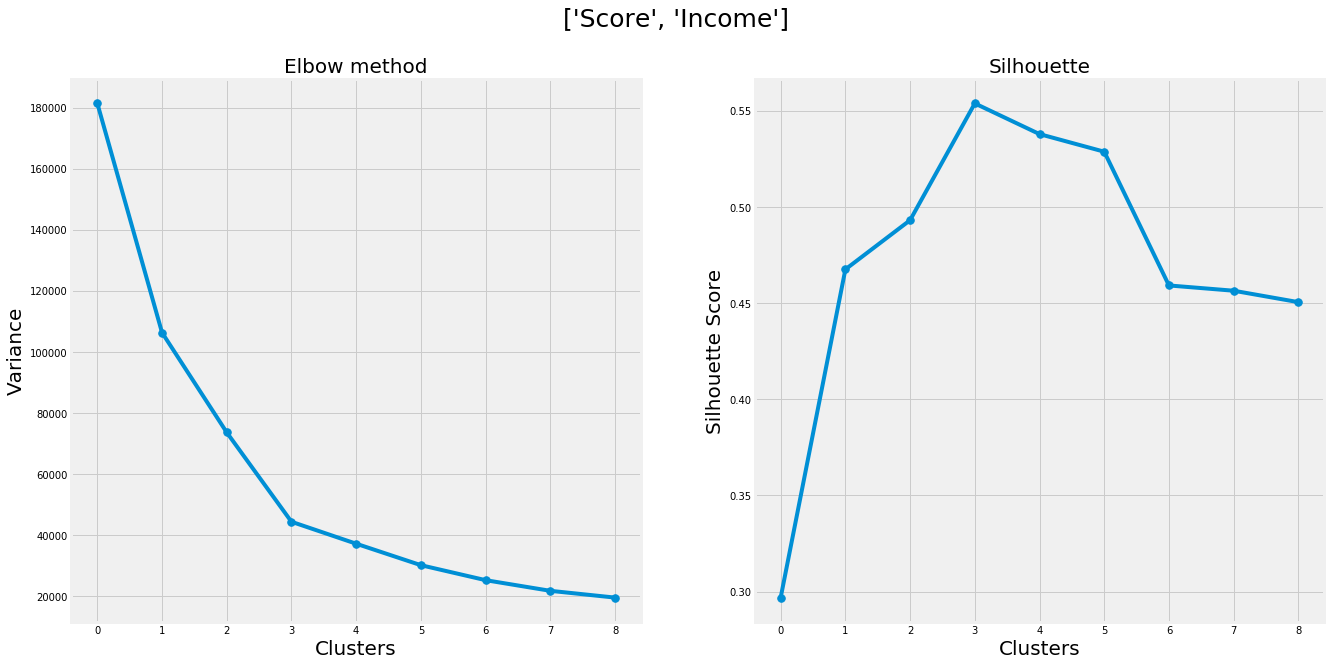

<Figure size 1440x720 with 0 Axes>

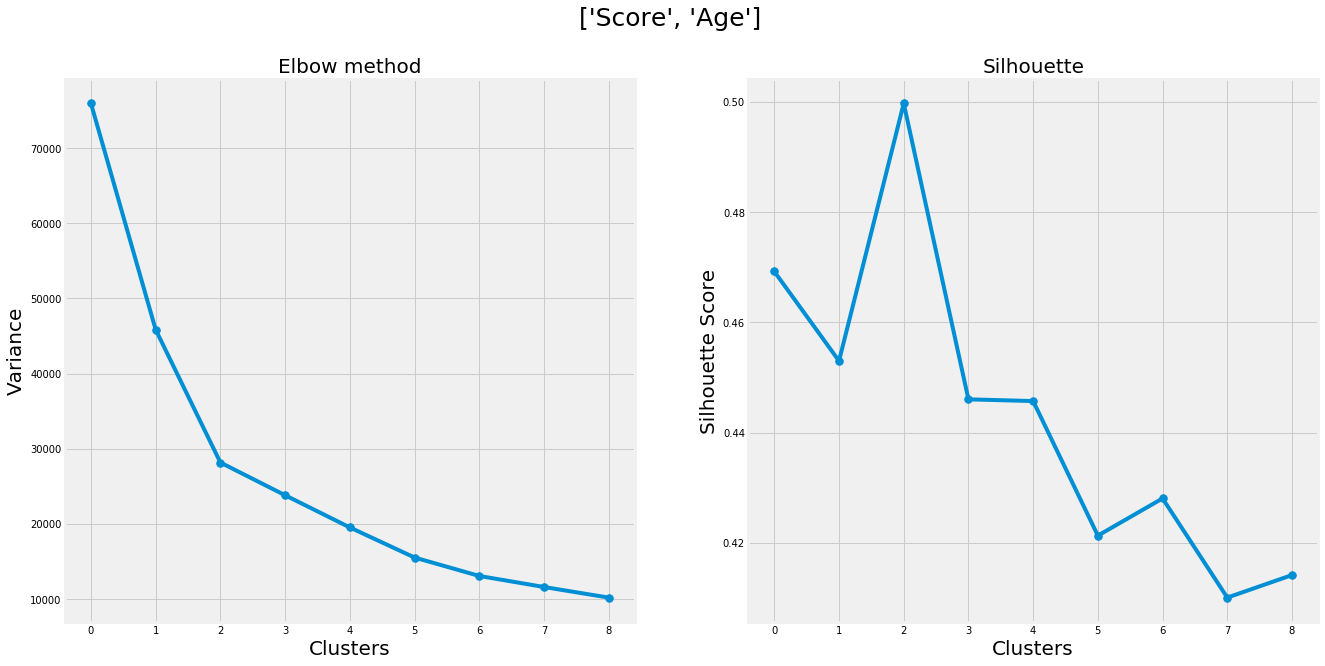

<Figure size 1440x720 with 0 Axes>

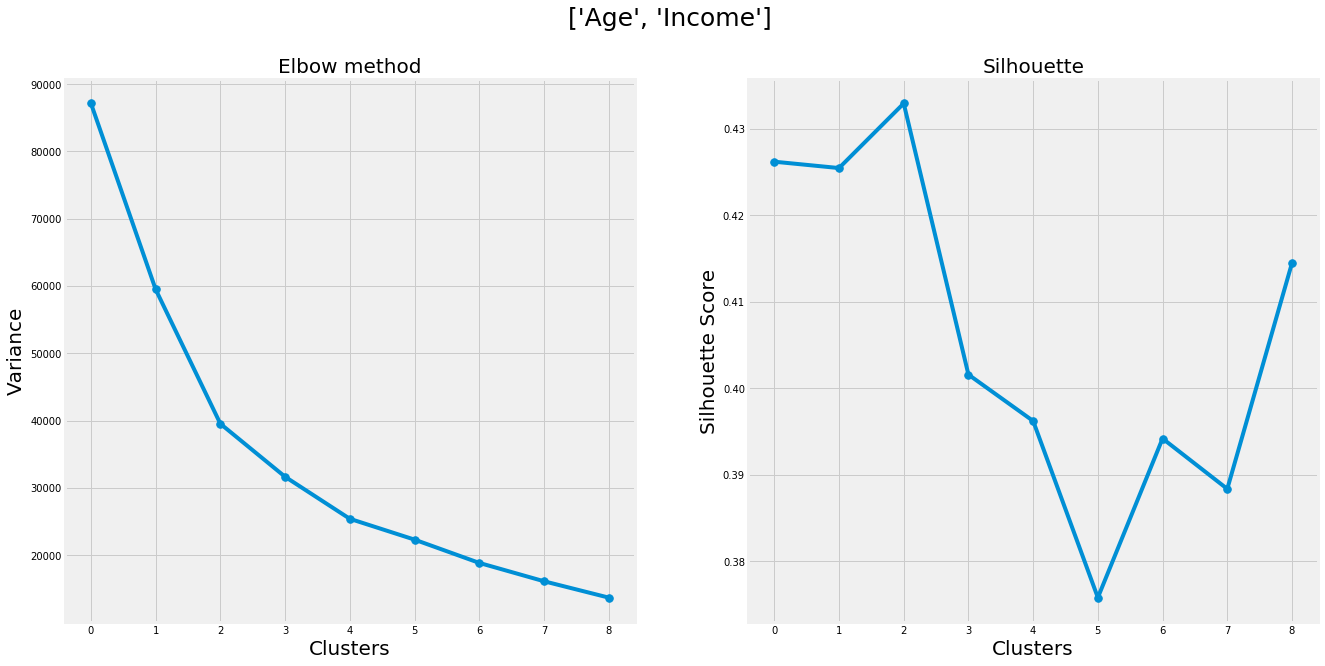

<Figure size 1440x720 with 0 Axes>

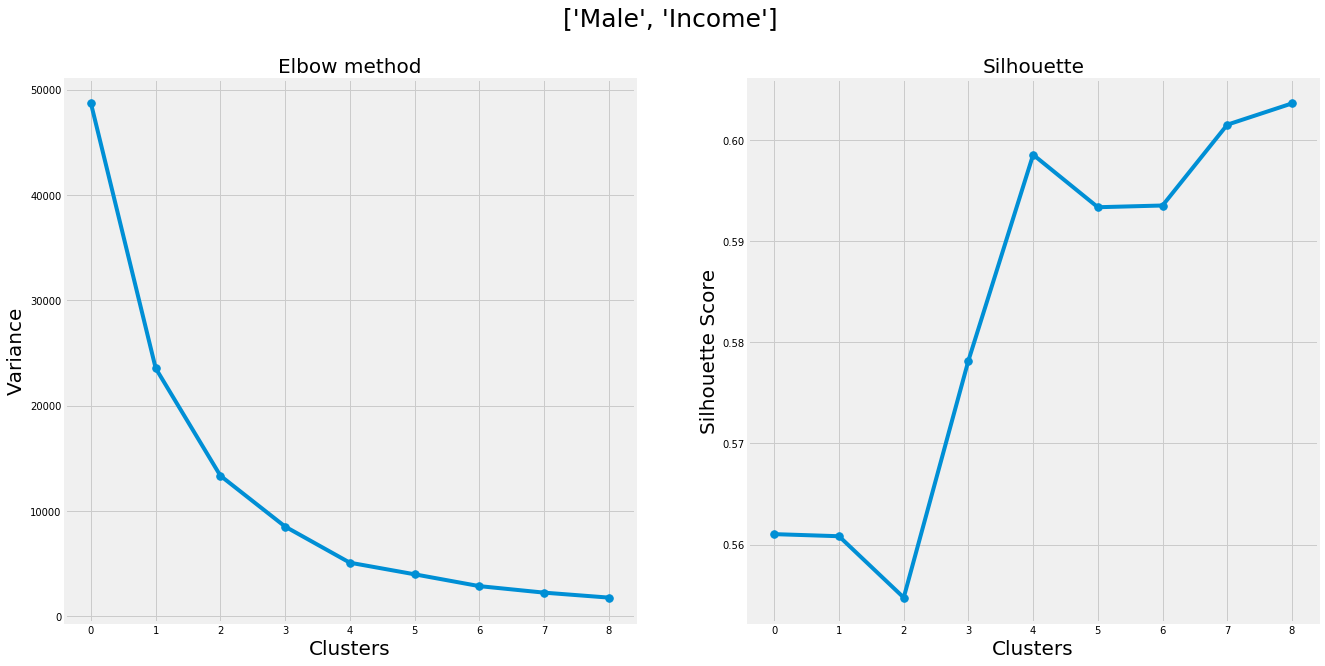

<Figure size 1440x720 with 0 Axes>

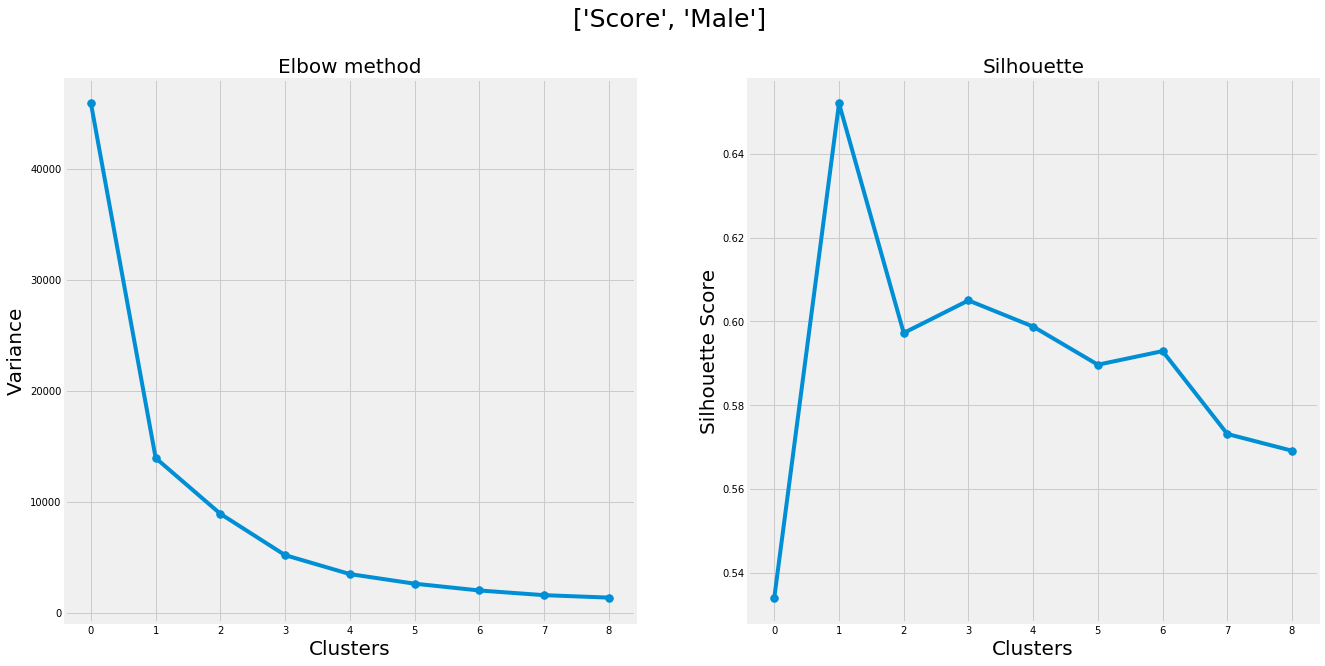

<Figure size 1440x720 with 0 Axes>

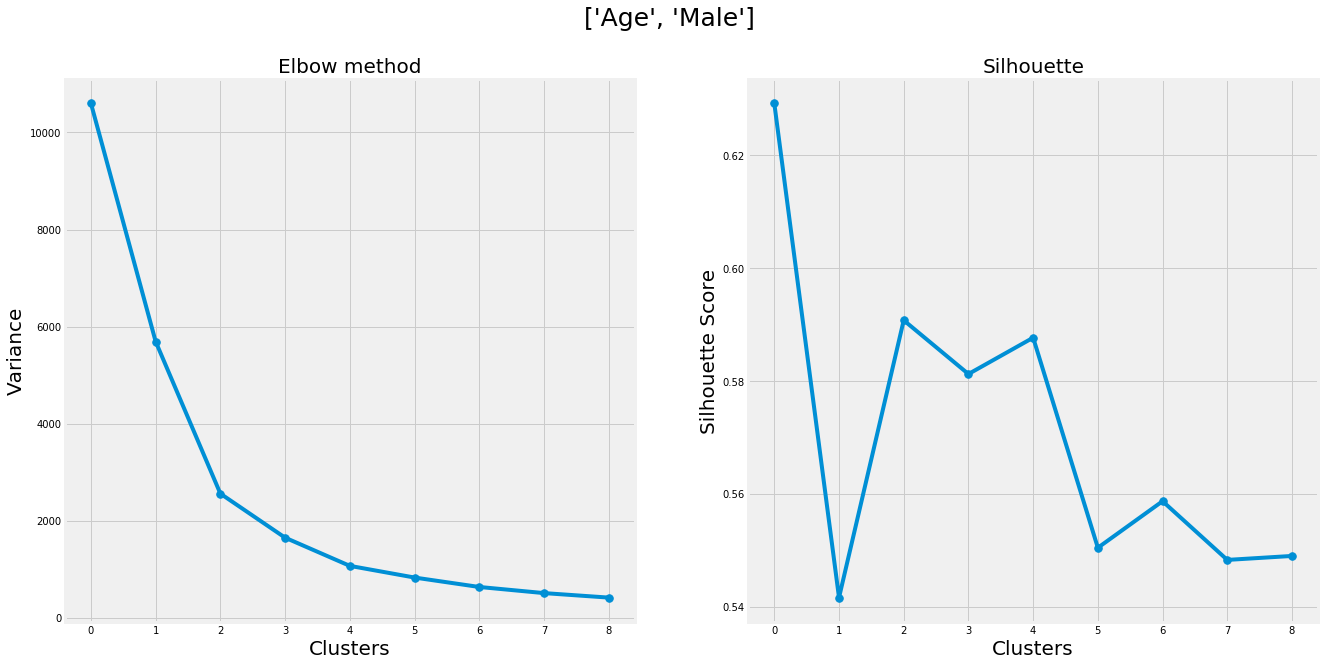

In [15]:
kmeans('Score','Income',_)
kmeans('Score','Age',_)
kmeans('Age','Income',_)
kmeans('Male','Income',_)
kmeans('Score','Male',_)
kmeans('Age','Male',_)

In [16]:
X = df_copy.iloc[:, [1,2]]
X.columns

Index(['Income', 'Score'], dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X) 
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

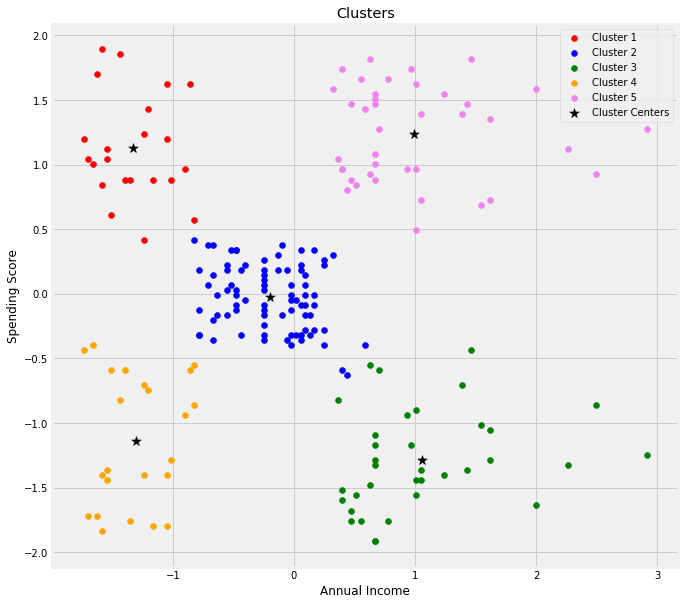

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],  c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],  c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],  c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],  c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],  c = 'violet', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='*', label='Cluster Centers')
plt.legend()
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()